In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/monster_com-job_sample.csv')
df.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [ ]:
# Check missing values
df.isnull().sum()

,0
country,0
country_code,0
date_added,21878
has_expired,0
job_board,0
job_description,0
job_title,0
job_type,1628
location,0
organization,6867


In [ ]:
# Display sample records
df[['job_title','job_description']].sample(5)

,job_title,job_description
20310,Senior Administrative Assistant/Legal Assistan...,AIG Investments has an opportunity for a Sr. A...
12626,Account Manager - Customer Service & Sales Job...,DescriptionProfessionals with customer service...
18868,Restaurant - Food and Beverage Jobs - LAX Airp...,HMSHost @ Los Angeles International Airport (L...
8107,Medical Program Assistant Associate Job in Mad...,Medical Program Assistant Associate: Pediatric...
6293,N Horizontal Construction Engineers Job in New...,12N Horizontal Construction Engineers Job Desc...


In [ ]:
# Basic statistics
print("Total samples:", len(df))
print("Unique job titles:", df['job_title'].nunique())

Total samples: 22000
Unique job titles: 18759


In [ ]:
df['category'].value_counts().head(10).plot(kind='bar')

KeyError: 'category'

In [ ]:
print(df.columns)

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'sector', 'uniq_id'],
      dtype='object')


In [21]:
def map_category(title):
    title = title.lower()
    if 'engineer' in title or 'developer' in title or 'software' in title:
        return 'IT'
    elif 'sales' in title or 'marketing' in title:
        return 'Marketing'
    elif 'accountant' in title or 'finance' in title or 'audit' in title:
        return 'Finance'
    elif 'nurse' in title or 'health' in title or 'medical' in title:
        return 'Healthcare'
    elif 'teacher' in title or 'education' in title:
        return 'Education'
    else:
        return 'Other'

In [22]:
df['category'] = df['job_title'].apply(map_category)
display(df.head())

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,category
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,Other
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,Other
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,Other
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,IT
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,Other


<Axes: xlabel='category'>

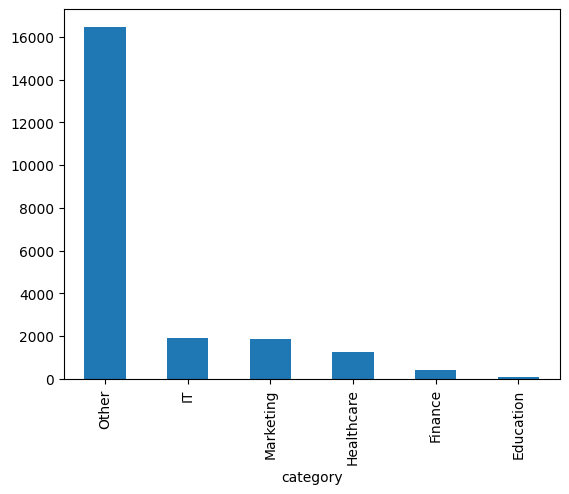

In [23]:
df['category'].value_counts().head(10).plot(kind='bar')

In [24]:
df.dropna(subset=['job_title', 'job_description'], inplace=True)

In [25]:
df.to_csv("job_data_labeled.csv", index=False)
